<a href="https://colab.research.google.com/github/Hsynyvz/Machine-Deep-learning/blob/main/bank_turnover_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bank Customer Classification
Given a dataset consisiting of Bank Customer information, we are asked to build a classifier which will tell us if a customer will exit the bank or not.


In [ ]:

from tensorflow.keras.layers import Dense ,Flatten, Dropout 
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn 
import numpy as np

#Data Preprocessing¶
In this dataset, we have to consider which of the factors may play a role in someone exiting a bank. To do that we must look at all the column and infer whether it will matter in classifying a new customer or not

In [ ]:
#importing the dataset
df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/Banks_turn_over_modeling/Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


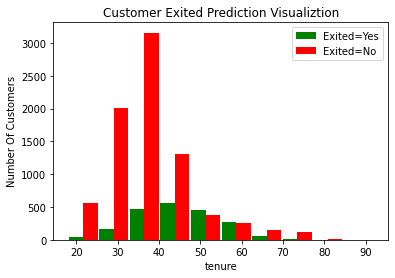

In [ ]:
exited_no = df[df.Exited==0].Age
exited_yes = df[df.Exited==1].Age

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion")

plt.hist([exited_yes,exited_no], rwidth=0.95, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()

In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df1 = df.drop(["RowNumber","CustomerId","Surname"] ,axis=1)

In [ ]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df1["Gender"].replace({'Female':1,'Male':0},inplace=True)

In [ ]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df1.dtypes

CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
# Encoding categorical (string based) data. Country: there are 3 options: France, Spain and Germany
df2 = pd.get_dummies(data=df1, columns=["Geography"], drop_first=True)

In [ ]:
df2.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
8126,729,0,39,6,127415.85,1,1,1,184977.20,1,1,0
8884,686,1,38,2,93569.86,3,0,0,10137.34,1,1,0
9462,800,1,46,6,0.00,2,1,0,171928.04,0,0,1
4168,516,0,37,8,0.00,1,1,0,101834.58,0,0,0
1472,726,1,26,1,80780.16,1,1,1,19225.85,0,0,1


In [ ]:
df3 = df2.astype("float64")

In [ ]:
df3.dtypes

CreditScore          float64
Gender               float64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard            float64
IsActiveMember       float64
EstimatedSalary      float64
Exited               float64
Geography_Germany    float64
Geography_Spain      float64
dtype: object

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
cols_to_scale = ['Balance','CreditScore','EstimatedSalary', "Age" ,"NumOfProducts"]


scaler = MinMaxScaler()
df3[cols_to_scale] = scaler.fit_transform(df3[cols_to_scale])

In [ ]:
df3.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,0.538,1.0,0.324324,2.0,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.0,0.0
1,0.516,1.0,0.310811,1.0,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,1.0
2,0.304,1.0,0.324324,8.0,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.0,0.0
3,0.698,1.0,0.283784,1.0,0.000000,0.333333,0.0,0.0,0.469120,0.0,0.0,0.0
4,1.000,1.0,0.337838,2.0,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,1.0


In [ ]:
X = df3.drop("Exited", axis=1)
y = df3["Exited"]

In [ ]:
X.shape, y.shape

((10000, 11), (10000,))

In [ ]:
# Splitting the dataset into the Training and Testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:



model = Sequential([
    Dense(12, activation='relu',input_shape=(11,)),
    Dense(6, activation='relu'),
    Dense(3, activation='relu'),
    Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)





#Compiling the Neural Network
.

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 247
Trainable params: 247
Non-trainable params: 0
_________________________________________________________________


#Fitting the Neural Network


In [ ]:
callback = EarlyStopping(monitor="val_loss", patience=5)

In [ ]:
history = model.fit(X_train, y_train, epochs=100,validation_split=0.2 , callbacks=callback)

Epoch 1/100
200/200 [==============================] - 4s 5ms/step - loss: 0.5146 - acc: 0.7928 - val_loss: 0.4796 - val_acc: 0.8087
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4862 - acc: 0.7922 - val_loss: 0.4551 - val_acc: 0.8106
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4653 - acc: 0.8000 - val_loss: 0.4528 - val_acc: 0.8112
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4562 - acc: 0.8050 - val_loss: 0.4401 - val_acc: 0.8206
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4461 - acc: 0.8078 - val_loss: 0.4311 - val_acc: 0.8269
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4392 - acc: 0.8112 - val_loss: 0.4398 - val_acc: 0.8100
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4339 - acc: 0.8134 - val_loss: 0.4189 - val_acc: 0.8331
Epoch 8/100
200/200 [==============================] - 1s 3ms/step - 

In [ ]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3663 - acc: 0.8470


[0.36628758907318115, 0.847000002861023]

#Testing the NN
Predicting the Test set results
This shows the probability of a customer leaving given the testing data. Each row in X_test corresponds to a row in Y_test

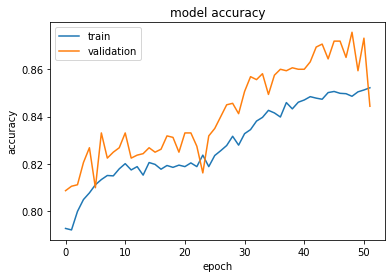

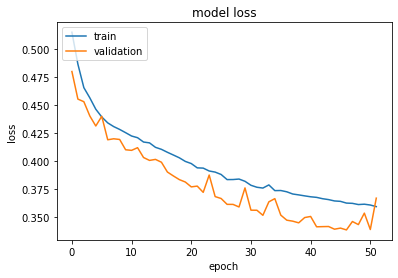

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
print(y_pred[:5])

[[0.04597991]
 [0.11879835]
 [0.21066491]
 [0.19209483]
 [0.12079877]]


In [ ]:
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


#Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Text(69.0, 0.5, 'Truth')

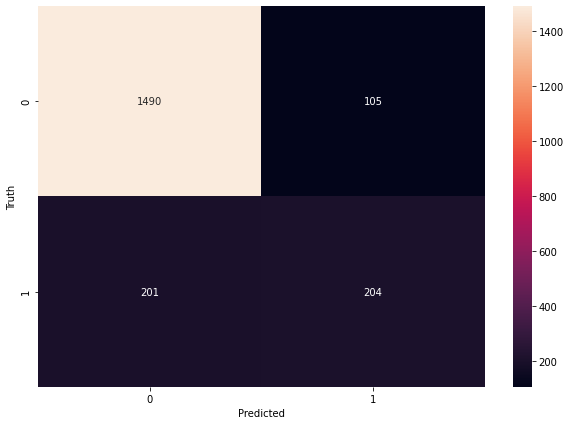

In [ ]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')